In [13]:
from math import *
from matplotlib.pylab import *
import numpy as np

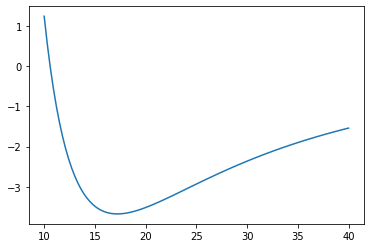

In [14]:

# solution to problem 3 to 5 of lecture 4

# problem 3

import numpy as np

# define Finnis-Sinclair
def FinnisSinclair(R):
 ab = 101.3
 bb = 2.80
 ar = 5707.8
 br = 3.54
 NN = 12
 Er =    NN * ar    * np.exp(-br*R)
 Eb = - (NN * ab**2 * np.exp(-bb*R))**(1./2)
 return Eb+Er

# define E(fcc)
def E_fcc(V):
  R= (4*V)**(1./3)/ (2**(1./2)) # (2*V)**(1./3) /(2.**(1./2)/2)
  return FinnisSinclair(R)

# list of V
V = np.linspace(10,40,100)



# compute and plot E(V)
E = E_fcc(V)
plot(V,E)





V0(FS) =  17.272727272727273
E0(FS) =  -3.669513851174112


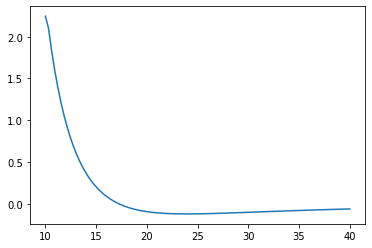

In [15]:
# find V with minimum E
idxmin = np.argmin(E)
V0 = V[idxmin]
E0 = E[idxmin]
print ("V0(FS) = ",V0)
print ("E0(FS) = ",E0)

# problem 4

# compute gradient of E data and pressure
dEdV = np.gradient(E,V[1]-V[0])
p = - dEdV
plot(V,p)




B0(FS) =  0.9695714009108207
[ 188.59002395 -483.13021253  400.80177031 -109.968511  ] 2
V0(model) =  17.272727272727273
E0(model) =  -3.7069292740842883


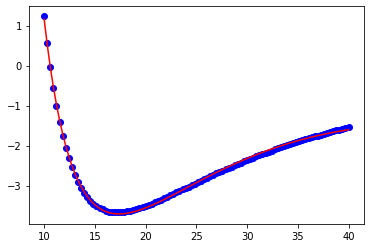

In [16]:
# compute bulk modulus B0
dpdV = np.gradient(p,V[1]-V[0])
B0 = - V[idxmin] * dpdV[idxmin]
print ("B0(FS) = ",B0)

# problem 5

# define model function
def Emodel(para,Vi):
  # This is the V0 taken from our calculation above.
  V0=17.2727272727
  x = (V0/Vi)**(1./3)
  a=para[0]; b=para[1]; c=para[2]; d=para[3]
  return a*x**3 + b*x**2 + c*x + d

# define error function
def errfunc(para,V,E):                # para = parameters.
  return (E-Emodel(para,V))**2

# fit model
import scipy.optimize as so
# help(so)
para0 = 1., 1., 1., 1.
#help(so.leastsq)
para1, success = so.leastsq(errfunc, para0, args=(V,E))
print (para1, success)

# compute Emodel and compare to Edata
Emodeldata = Emodel(para1,V)
plot(V,E,"bo")
plot(V,Emodeldata,"r-")


# compute min(Emodel)
idxmin = np.argmin(Emodeldata)
V0model = V[idxmin]
E0model = Emodeldata[idxmin]
print ("V0(model) = ",V0model)
print ("E0(model) = ",E0model)